In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np

In [2]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

In [94]:
I = 0.001
S = 1 - I
R = 0

num_contacts = 15
prob_trans = 0.03
duration = 10

beta = num_contacts * prob_trans
gamma = 1 / duration

sim_length = 120

r_0 = beta / gamma
r_0

4.499999999999999

$R_0$

In [100]:
def SIR(u, t):
    S, I, R = u
    dS = -beta * I * S 
    dI = beta * I * S - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

In [101]:
xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(SIR, [S, I, R], xs)

In [102]:
df = pd.DataFrame(ys, columns=["Susceptible", "Infected", "Recovered"])
df["Time"] = xs

In [103]:
dfmelt=pd.melt(df, id_vars=['Time'], 
               value_vars=["Susceptible", "Infected", "Recovered"], 
               var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible,0.999000
1,0.003333,Susceptible,0.998999
2,0.006667,Susceptible,0.998997
3,0.010000,Susceptible,0.998995
4,0.013334,Susceptible,0.998994
...,...,...,...
107995,119.986666,Recovered,0.988216
107996,119.990000,Recovered,0.988216
107997,119.993333,Recovered,0.988216
107998,119.996667,Recovered,0.988216


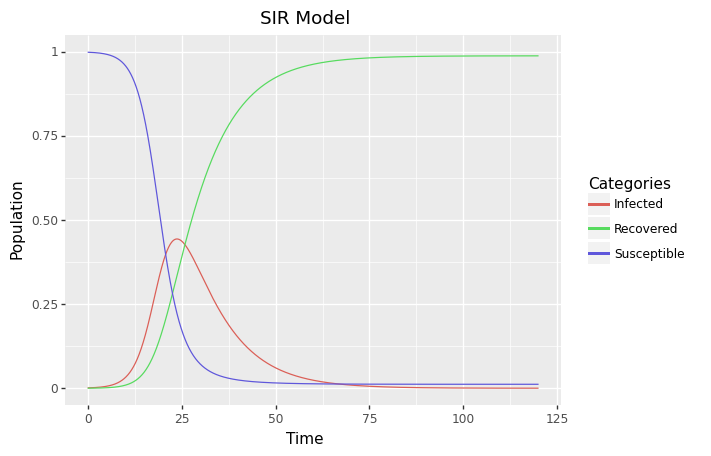

<ggplot: (8785662814808)>

In [104]:
ggplot(dfmelt, aes(x="Time", y="Population", color="Categories")) \
+ geom_line() \
+ labs(title="SIR Model")